# Integration of rational functions

In [1]:
from sympy import *
x, y = symbols("x y")
init_printing()

def squarefree_factorization(f):
    """
    Input: Monic f where deg(f) > 0

    Output: The squarefree factorization of f as described in Section 2.1
    """
    u = gcd(f, diff(f, x))
    v_1 = simplify(f / u)
    w_1 = simplify(diff(f, x) / u)

    v_list = [v_1]
    w_list = [w_1]
    h_list = []
    i = 0
    while v_list[i] != 1:
        h_i = gcd(v_list[i], w_list[i] - diff(v_list[i], x))
        v_i_p_1 = v_list[i] / h_i
        w_i_p_1 = (w_list[i] - diff(v_list[i], x)) / h_i

        v_list.append(simplify(v_i_p_1))
        w_list.append(simplify(w_i_p_1))
        h_list.append(h_i)

        i += 1

    return h_list

def partial_fraction_decomposition(g, f_decomposition):
    """
    Input: f_decomposition = [(f_1, e_1), ..., (f_r, e_r)] such that f = prod(fi**ei, i = 1, ..., r)

    Output: The partial fraction decomposition of g with respect to f as described in Section 2.2
    """
    g_list = [[] for _ in f_decomposition]
    for i, (f_i, e_i) in enumerate(f_decomposition):
        q = rem(g * prod([invert(f_j**e_j, f_i**e_i) for j, (f_j, e_j) in enumerate(f_decomposition) if j != i]), f_i**e_i)
        for j in range(e_i, 0, -1):
            g_i_j = rem(q, f_i)
            q = Poly(quo(q, f_i), x)

            g_list[i].append(g_i_j)

    [x.reverse() for x in g_list]
    return g_list

def linear_diophantine_equation(f, g, a):
    """
    Input: f, g, a are polynomials

    Output: s, t such that s f + t g = a such that deg(s) < deg(g) - deg(h) and deg(t) < deg(f) - deg(h) where h = gcd(f, g)
    """
    s0, t0, h = gcdex(f, g)
    if rem(Poly(a, x), Poly(h, x)) != 0:
        return "no such solution"
    
    s_star, t_star = s0 * a / h, t0 * a / h

    q, t = div(t_star, f/h)
    s = s_star + q * g/h

    return s, t

def complete_hermite_method(h_i_j_list, g_i_list):
    """
    See Section 3.1
    """
    V = 0
    m = len(h_i_j_list)
    for i in range(2, m+1):
        for j in range(i, 2-1, -1):
            g_i = g_i_list[i-1]
            h_i_j = h_i_j_list[i-1][j-1]
            s, t = linear_diophantine_equation(g_i, diff(g_i, x), h_i_j)
            V += (-t) / ((j - 1) * g_i**(j-1))
            h_i_j_list[i-1][j-1-1] += s + diff(t, x) / (j - 1)
    
    return [h_i[0] for h_i in h_i_j_list], V

def integration_of_rational_functions(f, g, show_info=False):
    """
    Input: Coprime polynomials f, g and g != 0 is monic

    Output: Integral of f/g
    """
    f = Poly(f, x)
    g = Poly(g, x)
    
    if gcd(f, g) != 1 or g == 0 or g.LC() != 1:
        return "f and g must be coprime, g != 0 and g must be monic" 
    
    # Normal integration
    h = rem(f, g)
    u = quo(f, g)
    U = integrate(u.as_expr(), x)
    
    if show_info:
        display("Normal integration")
        display("h = ", h.as_expr())
        display("u = ", u.as_expr())
        display("U = ", U.as_expr())

    # Hermite reduction
    g_i_list = squarefree_factorization(g)
    h_i_j_list = partial_fraction_decomposition(h, [(g_i, i+1) for i, g_i in enumerate(g_i_list)])
    h_i_1_list, V = complete_hermite_method(h_i_j_list, g_i_list)

    if show_info:
        display("Hermite reduction")
        display("g_i_list = ", [g_i.as_expr() for g_i in g_i_list])
        display("h_i_j_list = ", [[h_i_j.as_expr() for h_i_j in h_i_j_list_i] for h_i_j_list_i in h_i_j_list])
        display("h_i_1_list = ", [h_i_1.as_expr() for h_i_1 in h_i_1_list])
        display("V = ", V)

    # Repeated Rothstein-Trager
    W = 0
    m = len(h_i_1_list)
    if show_info:
        display("Repeated Rothstein-Trager")
        display("m = ", m)
    
    for i in range(1, m+1):
        a = Poly(h_i_1_list[i-1], x)
        b = Poly(g_i_list[i-1], x)
        r = resultant(b, a - y * diff(b, x), x)
        c_list = list(set(solve(Eq(r, 0))))

        v_i_list = [gcd(b, a - c_i * diff(b, x)) for c_i in c_list]

        if show_info:
            display("i = ", i)
            display("a = ", a.as_expr())
            display("b = ", b.as_expr())
            display("r = ", r.as_expr())
            display("c_list = ", c_list)
            display("v_i_list = ", [v_i.as_expr() for v_i in v_i_list])

        W += sum(
            [c_j * log(v_j.as_expr()) for c_j, v_j in zip(c_list, v_i_list)]
        )
    
    if show_info:
        display("W = ", W)

    return U + V + W

## Example 1

In [2]:
integration_of_rational_functions(1, x, show_info=True)

'Normal integration'

'h = '

'u = '

'U = '

'Hermite reduction'

'g_i_list = '

'h_i_j_list = '

'h_i_1_list = '

'V = '

'Repeated Rothstein-Trager'

'm = '

'i = '

'a = '

'b = '

'r = '

'c_list = '

'v_i_list = '

'W = '

## Example 2

'Normal integration'

'h = '

'u = '

'U = '

'Hermite reduction'

'g_i_list = '

'h_i_j_list = '

'h_i_1_list = '

'V = '

'Repeated Rothstein-Trager'

'm = '

'i = '

'a = '

'b = '

'r = '

'c_list = '

'v_i_list = '

'W = '

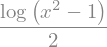

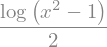

In [4]:
integration_of_rational_functions(x, x**2 - 1, show_info=True)